<a href="https://colab.research.google.com/github/SurajKumar2235/DigitPrediction/blob/main/HandWrittenDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import load_digits
df =  load_digits()

In [21]:
df.data.shape

(1797, 64)

In [22]:
df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

MNIST Data has 1797 different type of handwritten digit which is given to us in matrix format

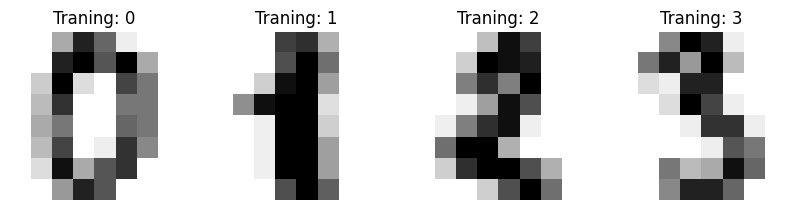

In [23]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Traning: %i' %label)

In [24]:
df.images.shape

(1797, 8, 8)

In [25]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [26]:
df.images[0].shape

(8, 8)

In [27]:
len(df.images)

1797

In [28]:
n_sample =  len(df.images)
data = df.images.reshape((n_sample,-1))

In [29]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
data[0].shape

(64,)

In [31]:
data.shape

(1797, 64)

In [32]:
data.min()

0.0

In [33]:
data.max()

16.0

In the dataset we see higest pixcel value is 16 and lowest is 0. we have to scale the value in range of 0-1.


In [34]:
data=data/16

In [35]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [36]:
x=data
y=df.target

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target, random_state=25)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [40]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
model.predict(x_test)

array([4, 0, 2, 4, 0, 3, 7, 2, 3, 1, 7, 4, 3, 6, 7, 9, 3, 9, 9, 7, 2, 9,
       8, 6, 7, 5, 5, 9, 2, 0, 7, 4, 6, 1, 4, 6, 5, 9, 0, 8, 5, 7, 7, 6,
       4, 2, 1, 3, 1, 4, 2, 0, 4, 2, 4, 2, 4, 1, 5, 4, 0, 9, 6, 0, 0, 8,
       6, 1, 9, 5, 1, 5, 3, 4, 1, 2, 7, 1, 9, 6, 3, 5, 7, 5, 5, 6, 5, 4,
       3, 1, 1, 3, 9, 5, 9, 8, 0, 7, 8, 5, 9, 7, 6, 5, 4, 9, 4, 3, 7, 0,
       7, 9, 7, 3, 5, 3, 4, 0, 1, 4, 9, 5, 6, 7, 1, 8, 5, 3, 8, 9, 7, 3,
       7, 8, 3, 8, 6, 6, 7, 0, 6, 2, 3, 4, 0, 2, 0, 3, 0, 1, 0, 3, 7, 6,
       7, 3, 4, 9, 4, 0, 8, 4, 1, 1, 6, 4, 4, 3, 8, 5, 3, 8, 7, 7, 9, 1,
       7, 9, 7, 6, 8, 3, 8, 5, 1, 8, 1, 1, 3, 1, 9, 0, 8, 8, 5, 2, 8, 1,
       0, 6, 7, 1, 7, 6, 0, 2, 5, 0, 7, 7, 2, 8, 1, 5, 6, 8, 0, 0, 6, 3,
       2, 9, 2, 4, 6, 2, 4, 3, 8, 3, 6, 1, 5, 0, 5, 3, 3, 9, 6, 6, 2, 6,
       1, 0, 4, 0, 1, 9, 9, 5, 6, 3, 6, 9, 1, 2, 9, 5, 5, 9, 7, 5, 8, 6,
       0, 4, 5, 4, 6, 1, 4, 7, 7, 9, 8, 0, 4, 2, 9, 4, 2, 2, 1, 6, 3, 5,
       4, 2, 8, 4, 8, 2, 4, 9, 0, 0, 3, 0, 1, 1, 4,

In [42]:
pred=model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,pred)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 46]])

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      0.96      0.97        46
           2       1.00      1.00      1.00        40
           3       0.96      0.93      0.95        46
           4       0.94      1.00      0.97        49
           5       0.98      0.98      0.98        46
           6       1.00      0.95      0.97        41
           7       0.96      0.98      0.97        46
           8       0.98      0.95      0.96        43
           9       0.96      0.98      0.97        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [46]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [47]:
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
model1.predict(x_test)

array([4, 0, 2, 4, 0, 3, 7, 2, 3, 1, 7, 4, 3, 6, 7, 9, 3, 9, 9, 7, 2, 9,
       8, 6, 7, 5, 5, 9, 2, 0, 7, 4, 6, 1, 4, 6, 3, 9, 0, 8, 5, 7, 7, 6,
       4, 2, 1, 3, 1, 4, 2, 0, 4, 2, 4, 2, 4, 1, 5, 4, 0, 9, 6, 0, 0, 8,
       6, 1, 9, 5, 1, 5, 3, 4, 1, 2, 7, 1, 9, 6, 3, 5, 7, 5, 5, 6, 5, 4,
       3, 1, 1, 3, 5, 5, 9, 8, 0, 7, 8, 5, 9, 4, 6, 5, 4, 9, 4, 3, 7, 0,
       7, 9, 7, 3, 5, 3, 8, 0, 1, 4, 9, 5, 6, 7, 1, 8, 5, 3, 8, 9, 7, 3,
       7, 8, 3, 8, 6, 6, 7, 0, 6, 2, 3, 4, 0, 2, 0, 3, 0, 1, 0, 3, 7, 6,
       7, 3, 6, 9, 4, 0, 8, 4, 1, 1, 6, 4, 4, 3, 8, 5, 3, 8, 7, 7, 9, 1,
       7, 9, 7, 6, 8, 3, 8, 5, 1, 8, 1, 1, 3, 1, 9, 0, 8, 8, 5, 2, 8, 1,
       0, 6, 7, 1, 7, 6, 0, 2, 5, 0, 7, 7, 2, 8, 1, 5, 6, 8, 0, 0, 6, 3,
       2, 9, 2, 4, 6, 2, 4, 3, 8, 3, 6, 1, 5, 0, 5, 3, 3, 9, 6, 6, 2, 6,
       1, 0, 4, 0, 1, 9, 9, 5, 6, 3, 6, 9, 1, 2, 9, 5, 5, 9, 7, 5, 3, 6,
       0, 4, 5, 4, 6, 1, 8, 7, 7, 3, 8, 0, 4, 2, 9, 4, 2, 2, 1, 6, 3, 5,
       4, 2, 8, 4, 8, 2, 4, 9, 0, 0, 3, 0, 1, 1, 4,

In [49]:
pred=model1.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
confusion_matrix(y_test,pred)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  1, 44]])

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        40
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        49
           5       1.00      1.00      1.00        46
           6       1.00      0.98      0.99        41
           7       1.00      1.00      1.00        46
           8       0.95      0.98      0.97        43
           9       1.00      0.94      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

